In [81]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import statistics

import sys
sys.path.insert(0, '..')

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline

Full training dataset

In [82]:
dataset = 'Breast_GSE42568'
# dataset = 'Colorectal_GSE44861'
# dataset = 'Leukemia_GSE71935'

n_tests = 20
n_iterations = 100

models = []
for i in range(n_tests):
	filename = f'{dataset}_{i}_it{n_iterations}_MinMaxSc_f.pkl'
	print(f'Reading test: {filename}')
	with open(f'../results-n3o-1-12-2021/{dataset}/{filename}', 'rb') as f:
		problem, params, res = pickle.load(f)
	models.append(res['model'])

Reading test: Breast_GSE42568_0_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_1_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_2_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_3_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_4_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_5_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_6_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_7_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_8_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_9_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_10_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_11_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_12_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_13_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_14_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_15_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_16_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_17_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_18_it100

In [83]:
g_mean = np.zeros((n_tests, 1))
features = np.zeros((n_tests, 1))
fs = np.zeros((n_tests, 1))
for i, model in enumerate(models):
	_, _, g_mean[i, 0] = model.evaluate(model.best_solution_test, model.x_test, model.y_test)
	features[i, 0] = model.x_test.shape[1]
	fs[i, 0] = model.best_solution_test.count_nodes()[0]

samples_train, samples_test = model.x_train.shape[0], model.x_test.shape[0]
n_samples = samples_train + samples_test
class_1 = (model.y_train.sum() + model.y_test.sum()) / n_samples
class_0 = 1 - class_1

print(f'Dataset {dataset}')
print(f"Labels: {problem['labels']}")
print(f'Proportion ({class_0:.02f}, {class_1:.02f})')
print(f'Number of samples: Total = {n_samples}, Train dataset = {samples_train}, Test dataset = {samples_test}')
print(f'Average features: {features.mean()}')
print(f'Feature selected: {fs.mean()}')
print(f'Best solution found for testing dataset')
print(f'Testing dataset gmean (mean): {g_mean.mean():.4f}')
print(f'Testing dataset gmean (std): {statistics.stdev(g_mean.squeeze()):.4f}')
print(f'Testing dataset gmean (max): {g_mean.max():.4f}')
print(f'Testing dataset gmean (min): {g_mean.min():.4f}')



Dataset Breast_GSE42568
Labels: {b'normal': 0, b'tumoral': 1}
Proportion (0.13, 0.87)
Number of samples: Total = 116, Train dataset = 81, Test dataset = 35
Average features: 16272.35
Feature selected: 5.0
Best solution found for testing dataset
Testing dataset gmean (mean): 0.9537
Testing dataset gmean (std): 0.0533
Testing dataset gmean (max): 1.0000
Testing dataset gmean (min): 0.8794


In [84]:
train_acc_f = np.zeros((n_tests, n_iterations + 1))
train_gmean_f = np.zeros((n_tests, n_iterations + 1))
train_fit_f = np.zeros((n_tests, n_iterations + 1))
test_acc_f = np.zeros((n_tests, n_iterations + 1))
test_gmean_f = np.zeros((n_tests, n_iterations + 1))
test_fit_f = np.zeros((n_tests, n_iterations + 1))

for i in range(n_tests):
	train_acc_f[i, :] = models[i].training_accuracy.T
	train_gmean_f[i, :] = models[i].training_gmean.T
	train_fit_f[i, :] = models[i].training_fitness.T
	test_acc_f[i, :] = models[i].testing_accuracy.T
	test_gmean_f[i, :] = models[i].testing_gmean.T
	test_fit_f[i, :] = models[i].testing_fitness.T

Batch of 80% of training dataset

In [85]:
models = []
for i in range(n_tests):
	filename = f'{dataset}_{i}_it{n_iterations}_MinMaxSc_f.pkl'
	print(f'Reading test: {filename}')
	with open(f'../results-n3o_80/{dataset}/{filename}', 'rb') as f:
		problem, params, res = pickle.load(f)
	models.append(res['model'])

Reading test: Breast_GSE42568_0_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_1_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_2_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_3_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_4_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_5_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_6_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_7_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_8_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_9_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_10_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_11_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_12_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_13_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_14_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_15_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_16_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_17_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_18_it100

In [86]:
g_mean = np.zeros((n_tests, 1))
features = np.zeros((n_tests, 1))
fs = np.zeros((n_tests, 1))
for i, model in enumerate(models):
	_, _, g_mean[i, 0] = model.evaluate(model.best_solution_test, model.x_test, model.y_test)
	features[i, 0] = model.x_test.shape[1]
	fs[i, 0] = model.best_solution_test.count_nodes()[0]

samples_train, samples_test = model.x_train.shape[0], model.x_test.shape[0]
n_samples = samples_train + samples_test
class_1 = (model.y_train.sum() + model.y_test.sum()) / n_samples
class_0 = 1 - class_1

print(f'Dataset {dataset}')
print(f"Labels: {problem['labels']}")
print(f'Proportion ({class_0:.02f}, {class_1:.02f})')
print(f'Number of samples: Total = {n_samples}, Train dataset = {samples_train}, Test dataset = {samples_test}')
print(f'Average features: {features.mean()}')
print(f'Feature selected: {fs.mean()}')
print(f'Best solution found for testing dataset')
print(f'Testing dataset gmean (mean): {g_mean.mean():.4f}')
print(f'Testing dataset gmean (std): {statistics.stdev(g_mean.squeeze()):.4f}')
print(f'Testing dataset gmean (max): {g_mean.max():.4f}')
print(f'Testing dataset gmean (min): {g_mean.min():.4f}')

Dataset Breast_GSE42568
Labels: {b'normal': 0, b'tumoral': 1}
Proportion (0.13, 0.87)
Number of samples: Total = 116, Train dataset = 81, Test dataset = 35
Average features: 16272.35
Feature selected: 3.85
Best solution found for testing dataset
Testing dataset gmean (mean): 0.9554
Testing dataset gmean (std): 0.0545
Testing dataset gmean (max): 1.0000
Testing dataset gmean (min): 0.8794


In [87]:
train_acc_80 = np.zeros((n_tests, n_iterations + 1))
train_gmean_80 = np.zeros((n_tests, n_iterations + 1))
train_fit_80 = np.zeros((n_tests, n_iterations + 1))
test_acc_80 = np.zeros((n_tests, n_iterations + 1))
test_gmean_80 = np.zeros((n_tests, n_iterations + 1))
test_fit_80 = np.zeros((n_tests, n_iterations + 1))

for i in range(n_tests):
	train_acc_80[i, :] = models[i].training_accuracy.T
	train_gmean_80[i, :] = models[i].training_gmean.T
	train_fit_80[i, :] = models[i].training_fitness.T
	test_acc_80[i, :] = models[i].testing_accuracy.T
	test_gmean_80[i, :] = models[i].testing_gmean.T
	test_fit_80[i, :] = models[i].testing_fitness.T

Batch of 60% of training dataset 

In [88]:
models = []
for i in range(n_tests):
	filename = f'{dataset}_{i}_it{n_iterations}_MinMaxSc_f.pkl'
	print(f'Reading test: {filename}')
	with open(f'../results-n3o_60/{dataset}/{filename}', 'rb') as f:
		problem, params, res = pickle.load(f)
	models.append(res['model'])

Reading test: Breast_GSE42568_0_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_1_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_2_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_3_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_4_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_5_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_6_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_7_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_8_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_9_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_10_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_11_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_12_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_13_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_14_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_15_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_16_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_17_it100_MinMaxSc_f.pkl
Reading test: Breast_GSE42568_18_it100

In [89]:
g_mean = np.zeros((n_tests, 1))
features = np.zeros((n_tests, 1))
fs = np.zeros((n_tests, 1))
for i, model in enumerate(models):
	_, _, g_mean[i, 0] = model.evaluate(model.best_solution_test, model.x_test, model.y_test)
	features[i, 0] = model.x_test.shape[1]
	fs[i, 0] = model.best_solution_test.count_nodes()[0]

samples_train, samples_test = model.x_train.shape[0], model.x_test.shape[0]
n_samples = samples_train + samples_test
class_1 = (model.y_train.sum() + model.y_test.sum()) / n_samples
class_0 = 1 - class_1

print(f'Dataset {dataset}')
print(f"Labels: {problem['labels']}")
print(f'Proportion ({class_0:.02f}, {class_1:.02f})')
print(f'Number of samples: Total = {n_samples}, Train dataset = {samples_train}, Test dataset = {samples_test}')
print(f'Average features: {features.mean()}')
print(f'Feature selected: {fs.mean()}')
print(f'Best solution found for testing dataset')
print(f'Testing dataset gmean (mean): {g_mean.mean():.4f}')
print(f'Testing dataset gmean (std): {statistics.stdev(g_mean.squeeze()):.4f}')
print(f'Testing dataset gmean (max): {g_mean.max():.4f}')
print(f'Testing dataset gmean (min): {g_mean.min():.4f}')

Dataset Breast_GSE42568
Labels: {b'normal': 0, b'tumoral': 1}
Proportion (0.13, 0.87)
Number of samples: Total = 116, Train dataset = 81, Test dataset = 35
Average features: 16272.35
Feature selected: 3.4
Best solution found for testing dataset
Testing dataset gmean (mean): 0.9615
Testing dataset gmean (std): 0.0523
Testing dataset gmean (max): 1.0000
Testing dataset gmean (min): 0.8794


In [90]:
train_acc_60 = np.zeros((n_tests, n_iterations + 1))
train_gmean_60 = np.zeros((n_tests, n_iterations + 1))
train_fit_60 = np.zeros((n_tests, n_iterations + 1))
test_acc_60 = np.zeros((n_tests, n_iterations + 1))
test_gmean_60 = np.zeros((n_tests, n_iterations + 1))
test_fit_60 = np.zeros((n_tests, n_iterations + 1))

for i in range(n_tests):
	train_acc_60[i, :] = models[i].training_accuracy.T
	train_gmean_60[i, :] = models[i].training_gmean.T
	train_fit_60[i, :] = models[i].training_fitness.T
	test_acc_60[i, :] = models[i].testing_accuracy.T
	test_gmean_60[i, :] = models[i].testing_gmean.T
	test_fit_60[i, :] = models[i].testing_fitness.T

Plots

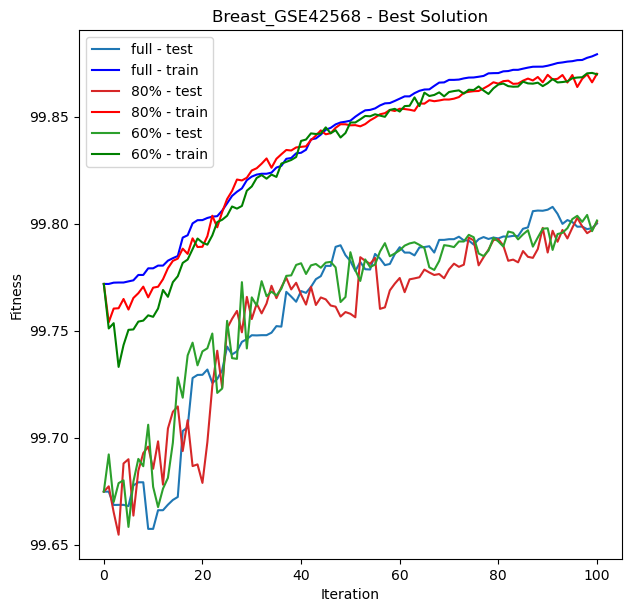

In [91]:
fig = plt.figure(figsize=(7,7), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Fitness')

plt.plot(np.mean(test_fit_f, axis=0), color='tab:blue', label='full - test')
plt.plot(np.mean(train_fit_f, axis=0), color='b', label='full - train')

plt.plot(np.mean(test_fit_80, axis=0), color='tab:red', label='80% - test')
plt.plot(np.mean(train_fit_80, axis=0), color='r', label='80% - train')

plt.plot(np.mean(test_fit_60, axis=0), color='tab:green', label='60% - test')
plt.plot(np.mean(train_fit_60, axis=0), color='g', label='60% - train')

ax.legend()


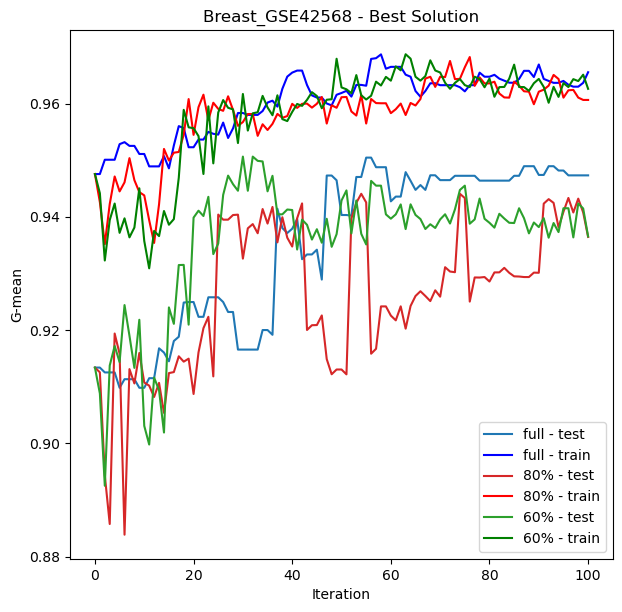

In [92]:
fig = plt.figure(figsize=(7,7), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('G-mean')

plt.plot(np.mean(test_gmean_f, axis=0), color='tab:blue', label='full - test')
plt.plot(np.mean(train_gmean_f, axis=0), color='b', label='full - train')

plt.plot(np.mean(test_gmean_80, axis=0), color='tab:red', label='80% - test')
plt.plot(np.mean(train_gmean_80, axis=0), color='r', label='80% - train')

plt.plot(np.mean(test_gmean_60, axis=0), color='tab:green', label='60% - test')
plt.plot(np.mean(train_gmean_60, axis=0), color='g', label='60% - train')

ax.legend()